<a href="https://colab.research.google.com/github/SiddharthMistry/HELLOWORLD/blob/main/3b_decisiontree_randomforest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


<ipython-input-2-47db9e6412ab>:15: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_data.corr()


SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64
              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


<ipython-input-2-47db9e6412ab>:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


[122.46809927 130.54390286 127.71449955  96.54229724 118.56360066
 114.43489931 124.79880158 117.80719945 107.95050128  98.30429978
  95.33759961 167.57449819 149.80370147 116.02300057 170.97190175
  84.87219995 122.98759872 108.91089695 113.30350036 131.81200231
 124.25409913 113.74640103 115.89300031 108.80019959 108.46190121
 125.75149967 119.32269977 112.53009912 113.37210139 125.91379882
 146.08630234  89.37190002 168.21479948 113.71659937 108.30380086
 120.08020111 141.30319845 161.36700143 174.39939818 153.14400107
 119.1351014  113.58590054 121.3001998  113.78419946 121.95510009
 107.94500065  88.57559864 114.55539943 129.867502   117.85960112
 104.16390038 129.89420236 107.26059838 160.22870385 131.95750027
 118.52739963 147.16850077 133.96860215  95.50780115 124.54120174
 114.67899893  86.05590083 104.22779905 113.85280053  84.13099917
 122.18520051 116.46819892 113.707302   164.79240261  92.29310068
  80.27190105 160.95240056 159.61650188 106.3364     149.93260072
 109.34099

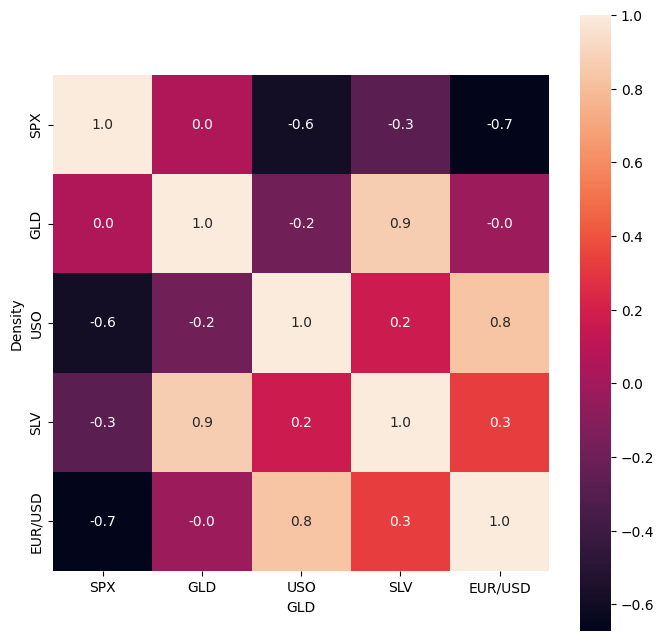

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
gold_data = pd.read_csv('/content/gold_price_data.csv.txt')
gold_data.head()
gold_data.tail()
gold_data.shape
gold_data.info()
gold_data.isnull().sum()
gold_data.describe()
correlation = gold_data.corr()
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={"size": 10})
print(correlation['GLD'])
sns.distplot(gold_data['GLD'],color='green')
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']
print(X)
print(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
regressor = RandomForestRegressor(n_estimators=100)
regressor.fit(X_train,Y_train)
test_data_prediction = regressor.predict(X_test)
print(test_data_prediction)